<a href="https://colab.research.google.com/github/TMA040685/Isotop_generator/blob/main/Det_simple_kerne_henfald.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Det simple kerne henfald.
I denne serie af små øvelser skal vi undersøge hvad der sker inde i isotop-generatoren som findes i fysik samlingen på Skolen. Dette gør vi i denne brugerflade således at vi har mulighed for at programere vores modeller og efterfølgende plotte hvad vi ønsker at se. 


---


Interfaset her består basalt set af en række felter som enten er tekst felter som dette eller er kode felter som lader os skrive program dele i programeringssproget python.

Denne serie består af en række af små øvelser som til sammen vil klæde dig på til at lave en model af en isotop generator.


## Malkekoen - skolens isotopgenerator
På et hvert gymnasium findes en eller flere malkekøer som anvendes når der skal bestemmes eksempelvis halveringstid for radioaktive isotoper. I kender dem fra den eksperimentelle undervisning. Malkekoen fungere ved ionbytning som beskrevet på siderne 92 - 105 i bogen Hospitalsfysik af *Nyvang, L. et al.*. 

Vores malkeko indeholder dog ikke $^{99}\mathrm{Mo}$ men derimod indeholder vores malkekøer $^{137}\mathrm{Cs}$ som beskrevet hos forhandleren ([Datablad for isotopgenerator](https://shop.skolebutik.dk/images/pdf/isotop_brugsvejledning_nyt%20logo.pdf)).

---

Derfor vil den første kerne reaktion der forløber inde i isotopgeneratoren være den som danner den metastabile Barium kerne som vi er interesserede i når vi skal lave eksperimenter, fx måling af halveringstiden for radioaktive isotoper.

Vi begynder med at gøre nogle få ting klar, det drejer sig bl.a. om at klargøre pakker m.v. således at vi kan lave vores beregninger.

>Du kan til en hver tid afvikle en kode celle ved at placere dig i cellen og trykke på <code>shift</code> + <code>enter</code>.


In [1]:
# Indlæs biblioteket numpy der er særlig godt til at behandle store datamængder
import numpy as np
# Indlæs matplotlib til at plotte resultaterne af vores beregninger
from matplotlib import pyplot as plt
# Aktiver linjebaseret plot med matplot lib
%matplotlib inline

# Havelågen angiver at denne linje er en kommentar og den læses ikke af programmet
# Vi kan altid indlæse flere biblioteker hvis vi skulle få brug for det.


### Det simple henfald 
I den øvelse vi nu skal lave skal vi se på hvordan kernerne henfalder fra $^{137}\mathrm{Cs}$ til $^{137}\mathrm{Ba}^{\star}$. Her angiver $\star$ at der er tale om en metastabil tilstand som igen vil henfalde. Henfaldet er via en beta-minus kanal

$$^{137}_{\phantom{1}55}\mathrm{Cs} \rightarrow ^{137}_{\phantom{1}56}\mathrm{Ba}^{\star} + ^{\phantom{-}0}_{-1}e+\bar{\nu}_{e}$$

Vi skal nu slå halveringstiden op for $^{137}_{\phantom{1}55}\mathrm{Cs}$ og programmere henfaldet. 

In [2]:
CT12 = 30.17                  # år jf opslag i databogen s. 204
CT12s = 30.17*365.25*86400    # Halveringtid i sekunder
print('Halveringtid i sekunder: ', CT12s)

Halveringtid i sekunder:  952092792.0


Lad os nu prøve at beregne henfaldskonstanten for det henfald vi her undersøger.
Her skal vi huske på følgende sammenhæng.

$$ k = \frac{\ln(2)}{T_{\tfrac{1}{2}}} $$

hvor $k$ er henfaldskonstanen mens $T_{\tfrac{1}{2}}$ er halveringstiden i sekunder.

In [3]:
kC = np.log(2)/CT12s            # i numpy kan ln beregnes som log mens den almindelige log() kaldes som log10()
print('Henfaldskonstanten k= ', kC, '1/s')

Henfaldskonstanten k=  7.280248168919498e-10 1/s


### At skabe en model
Når vi skal lave vores model skal vi have to forskellige lister. En hvor vi kan holde styr på moder-kernerne og en hvor vi kan holde styr på datter-kernerne. Samtidig skal vi definere en tidsvektor som indeholder de tidsskridt vi ønsker os at foretage vores beregning for. 

>I dette eksempel vil vi bruge <mark>linspace</mark> som laver en liste som indeholder et defineret antal punkter med den samme afstand mellem vores samples. 


In [4]:
Mk = np.linspace(0,3E10, 1000)     # Liste til vores moder-kerner
Dk = np.linspace(0,3E10, 1000)     # Liste til vores datter-kerner
t = np.linspace(0,7E9, 1000)      # vores tidsvektor ca. 200 år
Nks = 200                         # Vores oprindelige andel i %

Mk[0] = Nks                       # Sæt vores begyndelsesværdi for moderkernerne til vores start andel.

# Nu laver vi beregningen for hvor mange kerner der er tilbage efter første tidsskridt.
N2 = Nks * np.exp(-kC*t[1])
print('Antallet af kerner tilbage efter første tidsskridt: ', N2, '%')

Antallet af kerner tilbage efter første tidsskridt:  198.98234288262876 %


Lad os nu prøve at gøre dette for alle vores tidsskridt. Dette gøres med en løkke. Vi vil anvende en for-løkke til at løse dette problem for-løkken aktiveres på følgende vis. 
```Python
for i in range(0, 1000):
  x[i] = 1/(2*t[i])
```
I denne kode ser vi at vi anvender en for-løkke og at vi bruger *variablen* **i** til at holde styr på hvor langt vi er i løkken. Vi kan også se at **i** kan varieres mellem 0 og 1000 i argumentet *range(0,1000)*.
Herefter skal du på næste linje huske at lave en indentering hvilket programmet burde gøre af sig selv. Her skriver du så indholdet af løkken. Først når du komme ud til den venstre margen igen vil du være ude af løkken. I denne løkke beregnes den *i'te* position i liste *x* som 1 delt med (2* den *i'te* position i liste *t*).
med andre ord.

$$ x_i = \frac{1}{2\cdot t_i}$$

lad os nu prøve at regne ud hvordan udviklingen af moder-kerner vil se ud over tid.

In [5]:
from math import exp
for i in range(1,1000):
   Mk[i] = Mk[0]*exp(-kC*t[i])


### lav en graf
Nu har du lavet beregningen for udviklingen af moder-kerner men passer det med virkeligheden lad os se ved at lave en figur.

(0.0, 100.0)

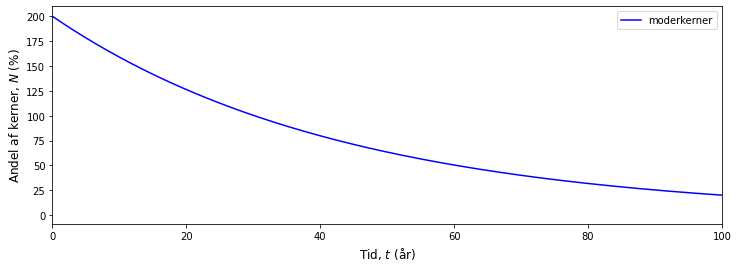

In [21]:
plt.figure(figsize=(12,4))                                      # Start en figur som er 12 enheder lang og 4 enheder høj
plt.plot(t/(365.25*86400),Mk,'b-',label='moderkerner')          # Plot vores beregninger med en blå linje og navngiv den moderkerner
plt.xlabel('Tid, $t$ (år)', fontsize=12)                        # Sæt x-aksetitlen med skriftstørrelse 12
plt.ylabel('Andel af kerner, $N$ (%)', fontsize=12)             # Sæt y-aksetitlen med skriftstørrelse 12
plt.legend()                                                    # Skriv en boks på figuren med signaturer 
plt.xlim([0,100])                                                 # Sæt grænser på x-aksen
#plt.yscale('log')

## En anden numerisk tilgang
Her under følger en anden tilgang til at løse denne opgave. I det følgende anvender vi at tilvæksten i antallet af moderkerner kan skrives som

$$ N'_m (t) =\frac{dN_m (t)}{dt} = -k_m\cdot N_m(t)$$

hvor $k_m$ er henfaldskonstanten for moderkernerne.


Henfaldskonstanten k=  0.022974715961549395 pr. år
-2.2974715961549395


(0.0, 100.0)

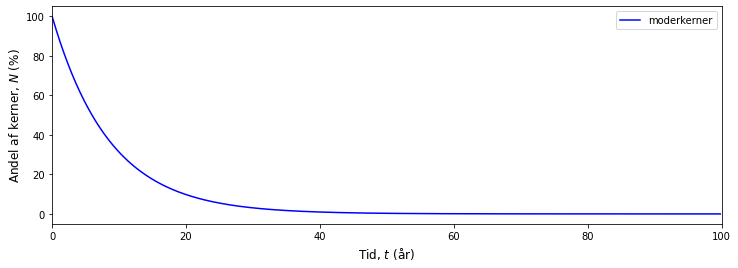

In [24]:
kC2 = np.log(2)/CT12
print('Henfaldskonstanten k= ',kC2, 'pr. år')

# Definer et tidsskridt 
dt = 0.2                # år

t2 = [0.0]
Mk2 = [100]

for i in range(1, 500):
  mn = -kC2*Mk2[i-1]
  Mk2.append(Mk2[i-1]+mn)
  t2.append(t2[i-1]+dt)

print(-kC2*Mk2[0])
plt.figure(figsize=(12,4))                                      # Start en figur som er 12 enheder lang og 4 enheder høj
plt.plot(t2,Mk2,'b-',label='moderkerner')          # Plot vores beregninger med en blå linje og navngiv den moderkerner
plt.xlabel('Tid, $t$ (år)', fontsize=12)                        # Sæt x-aksetitlen med skriftstørrelse 12
plt.ylabel('Andel af kerner, $N$ (%)', fontsize=12)             # Sæt y-aksetitlen med skriftstørrelse 12
plt.legend()                                                    # Skriv en boks på figuren med signaturer 
plt.xlim([0,100]) 
#plt.yscale('log')


### Tilføj nu udviklingen af den metastabile dattterkerne
Det er klart at når en kerne henfalder bliver den til en datter kerne. Vi  vil nu forsøge at inkorporere dette i vores model.

Dette gøres ved at vi lader de datter kerner som er henfaldet fra moderkernerne blive til datterkerner således at:

$$ N'_2 (t) = N_2(t)+f\cdot k_1\cdot N_1(t)$$

hvor $f$ er den procentdel af kernerne som følger denne henfaldskanal

(0.0, 100.0)

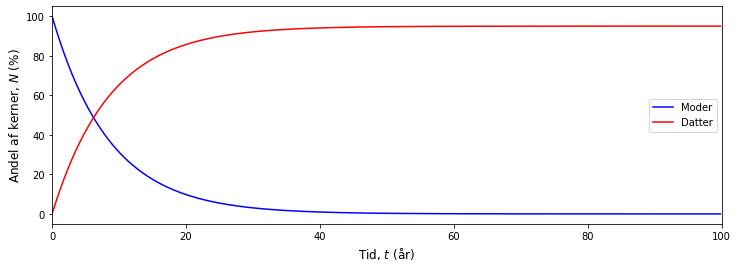

In [33]:
Dk2 = [0.0]

t3 = [0.0]
Mk3 = [100]
f = 0.95

for i in range(1, 500):
  mn = -kC2*Mk3[i-1]
  Mk3.append(Mk2[i-1]+mn)
  Dk2.append(Dk2[i-1]-f*mn)
  t3.append(t3[i-1]+dt)
  

plt.figure(figsize=(12,4))                                      
plt.plot(t3,Mk2,'b-',label='Moder')          
plt.plot(t3,Dk2,'r-',label='Datter')
plt.xlabel('Tid, $t$ (år)', fontsize=12)                        
plt.ylabel('Andel af kerner, $N$ (%)', fontsize=12)             
plt.legend()                                                    
plt.xlim([0,100])

### Datterkernen er kun meta-stabil
Derfor skal vi nu kompencere for dette og derved nå i mål. med en figur som viser udviklingen af kerner over tid. 


0.004528597808440777 pr. sek


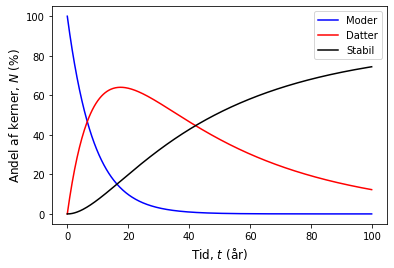

In [41]:
Mk4 = [100]     # Moderkerne
Dk3 = [0.0]     # Datterkerne
Sk2 = [0.0]     # Stabil kerne
t4  = [0.0]     # tidsvektor

TBa = 2.551     # minutter databogen s. 205
Tbay= TBa*60
kBa = np.log(2)/Tbay
print(kBa, 'pr. sek')

f = 0.95        # Henfaldskanal 1
g = 0.90        # Hengaldskanal 2

for i in range(1, 500):
  mn = -kC2*Mk4[i-1]
  Mk4.append(Mk4[i-1]+mn)
  dn = -kBa*Dk3[i-1]
  Dk3.append(Dk3[i-1]-f*mn+dn)
  Sk2.append(Sk2[i-1]-g*dn)
  t4.append(t4[i-1]+dt)

plt.plot(t4,Mk4,'b-',label='Moder')          
plt.plot(t4,Dk3,'r-',label='Datter')
plt.plot(t4,Sk2,'k-',label='Stabil')
plt.xlabel('Tid, $t$ (år)', fontsize=12)                        
plt.ylabel('Andel af kerner, $N$ (%)', fontsize=12)             
plt.legend()                                                    
#plt.xlim([0,0.2])